# K Nearest Neighbors com Python
Você recebeu um conjunto de dados classificados de uma empresa. Eles ocultaram a coluna de parâmetros, mas lhe deram os dados e a classe de destino.

Vamos tentar usar o KNN para criar um modelo que possa predizer diretamente a classe para um novo ponto de dados baseado nos parâmetros.

Vamos pegar e usá-lo!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("Classified Data",index_col=0)

#Obter dados
Defina index_col = 0 para usar a primeira coluna como índice.

In [3]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


In [6]:
df.columns

Index(['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ',
       'TARGET CLASS'],
      dtype='object')

In [8]:
len(df.columns)

11

## Normalizar as variáveis
A normalização é importante no algoritmo KNN porque ele usa a distância entre os pontos de dados para determinar os vizinhos mais próximos. Se uma variável está a uma escala muito maior do que as outras ela pode dominar a distância, tornando o algoritmo KNN em um classificador de uma variável só. A normalização garante que todas as variáveis contribuam igualmente para a distância, independentemente de sua escala original.

In [11]:
#vamos usar a classe StandardScaler para implementar normalização
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()

**vamos usar O método fit para calcular a média e o desvio padrão das variáveis no conjunto de dados df,
excluindo a variável alvo ‘TARGET CLASS’**

In [13]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

In [15]:
# obter as variáveis normalizadas e armazená-las na variável scaled_features
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [16]:
#vamos criar um novo DataFrame df_feat com as variáveis normalizadas
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


**Como de costume, vamos dividir nossos dados em dados de treino e teste**

In [17]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'], test_size=0.30)

## Usando o KNN
Lembre-se de que estamos tentando encontrar um modelo para prever se alguém estará na TARGET CLASS ou não.<br>
Começaremos com k=1

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
knn = KNeighborsClassifier(n_neighbors=1)

In [22]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [23]:
pred = knn.predict(X_test)

## Previsões e avaliações
Vamos avaliar o nosso modelo KNN.

In [24]:
from sklearn.metrics import classification_report,confusion_matrix

In [25]:
print(confusion_matrix(y_test,pred))

[[142  13]
 [ 15 130]]


In [26]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       155
           1       0.91      0.90      0.90       145

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



# Escolhendo um valor K
Vamos em frente e usar o método do cotovelo para escolher um bom Valor K:

In [27]:
# vamos executar o modelo usando diferentes valore para k(entre 1 e 40) e armazenar a taxa de erro em uma lista
error_rate = []

# Levará algum tempo
for i in range(1,40):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [29]:
error_rate

[0.09333333333333334,
 0.11333333333333333,
 0.08,
 0.09,
 0.08666666666666667,
 0.08,
 0.09,
 0.07,
 0.09,
 0.07,
 0.08333333333333333,
 0.07666666666666666,
 0.07333333333333333,
 0.06333333333333334,
 0.07333333333333333,
 0.06333333333333334,
 0.07333333333333333,
 0.07333333333333333,
 0.07666666666666666,
 0.07,
 0.07333333333333333,
 0.06333333333333334,
 0.07333333333333333,
 0.06666666666666667,
 0.07,
 0.06333333333333334,
 0.07666666666666666,
 0.07,
 0.07333333333333333,
 0.07666666666666666,
 0.07666666666666666,
 0.08,
 0.07666666666666666,
 0.08,
 0.08,
 0.08,
 0.08,
 0.07666666666666666,
 0.07666666666666666]

Text(0, 0.5, 'Error Rate')

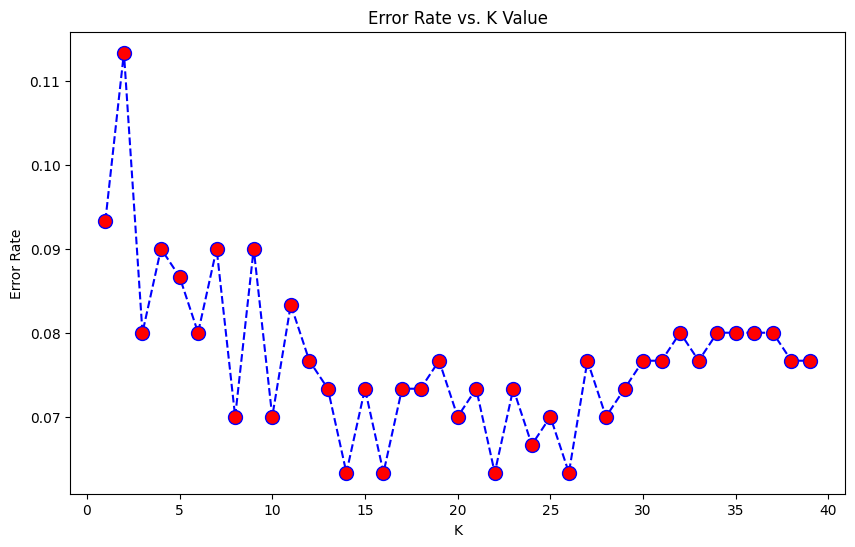

In [31]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Aqui podemos ver que, após cerca de K > 23, a taxa de erro tende a girar em torno de 0,06-0,05. Vamos treinar novamente o modelo com isso e verificar o relatório de classificação!

In [33]:
# Vamos executar o modelo com K = 23
knn = KNeighborsClassifier(n_neighbors=23)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=23')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=23


[[141  14]
 [  8 137]]


              precision    recall  f1-score   support

           0       0.95      0.91      0.93       155
           1       0.91      0.94      0.93       145

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



# Conclusão:
Os resultados mostram que o modelo KNN com k = 23 tem um desempenho bastante bom.

A precisão do modelo é de 0,95 para a classe 0 e 0,91 para a classe 1, o que significa que quando o modelo prevê uma instância como pertencente a uma classe, ele está correto 95% das vezes para a classe 0 e 91% das vezes para a classe 1.

O recall do modelo é de 0,91 para a classe 0 e 0,94 para a classe 1, o que significa que o modelo identifica corretamente 91% das instâncias da classe 0 e 94% das instâncias da classe 1.

O F1-score, que é a média harmônica da precisão e do recall, é de 0,93 para ambas as classes, indicando um bom equilíbrio entre precisão e recall.

A acurácia geral do modelo, que é a proporção de previsões corretas, é de 0,93. Isso significa que o modelo fez a previsão correta em 93% das vezes para este conjunto de teste.

Em resumo, o modelo KNN com k = 23 apresenta um bom desempenho na classificação das duas classes, com alta precisão, recall e F1-score.